<a href="https://www.kaggle.com/code/blessingumoru/playground-s3e12-using-cb-regres?scriptVersionId=124619840" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv


In [2]:
train_data= pd.read_csv('/kaggle/input/playground-series-s3e12/train.csv')
test_data= pd.read_csv('/kaggle/input/playground-series-s3e12/test.csv')
inputdata = train_data[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]
ttdata =test_data[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]

In [3]:
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4),

(None, None)

In [4]:
train_data.isna().sum(), test_data.isna().sum()

(id         0
 gravity    0
 ph         0
 osmo       0
 cond       0
 urea       0
 calc       0
 target     0
 dtype: int64,
 id         0
 gravity    0
 ph         0
 osmo       0
 cond       0
 urea       0
 calc       0
 dtype: int64)

In [5]:
train_data.duplicated().sum(),test_data.duplicated().sum()

(0, 0)

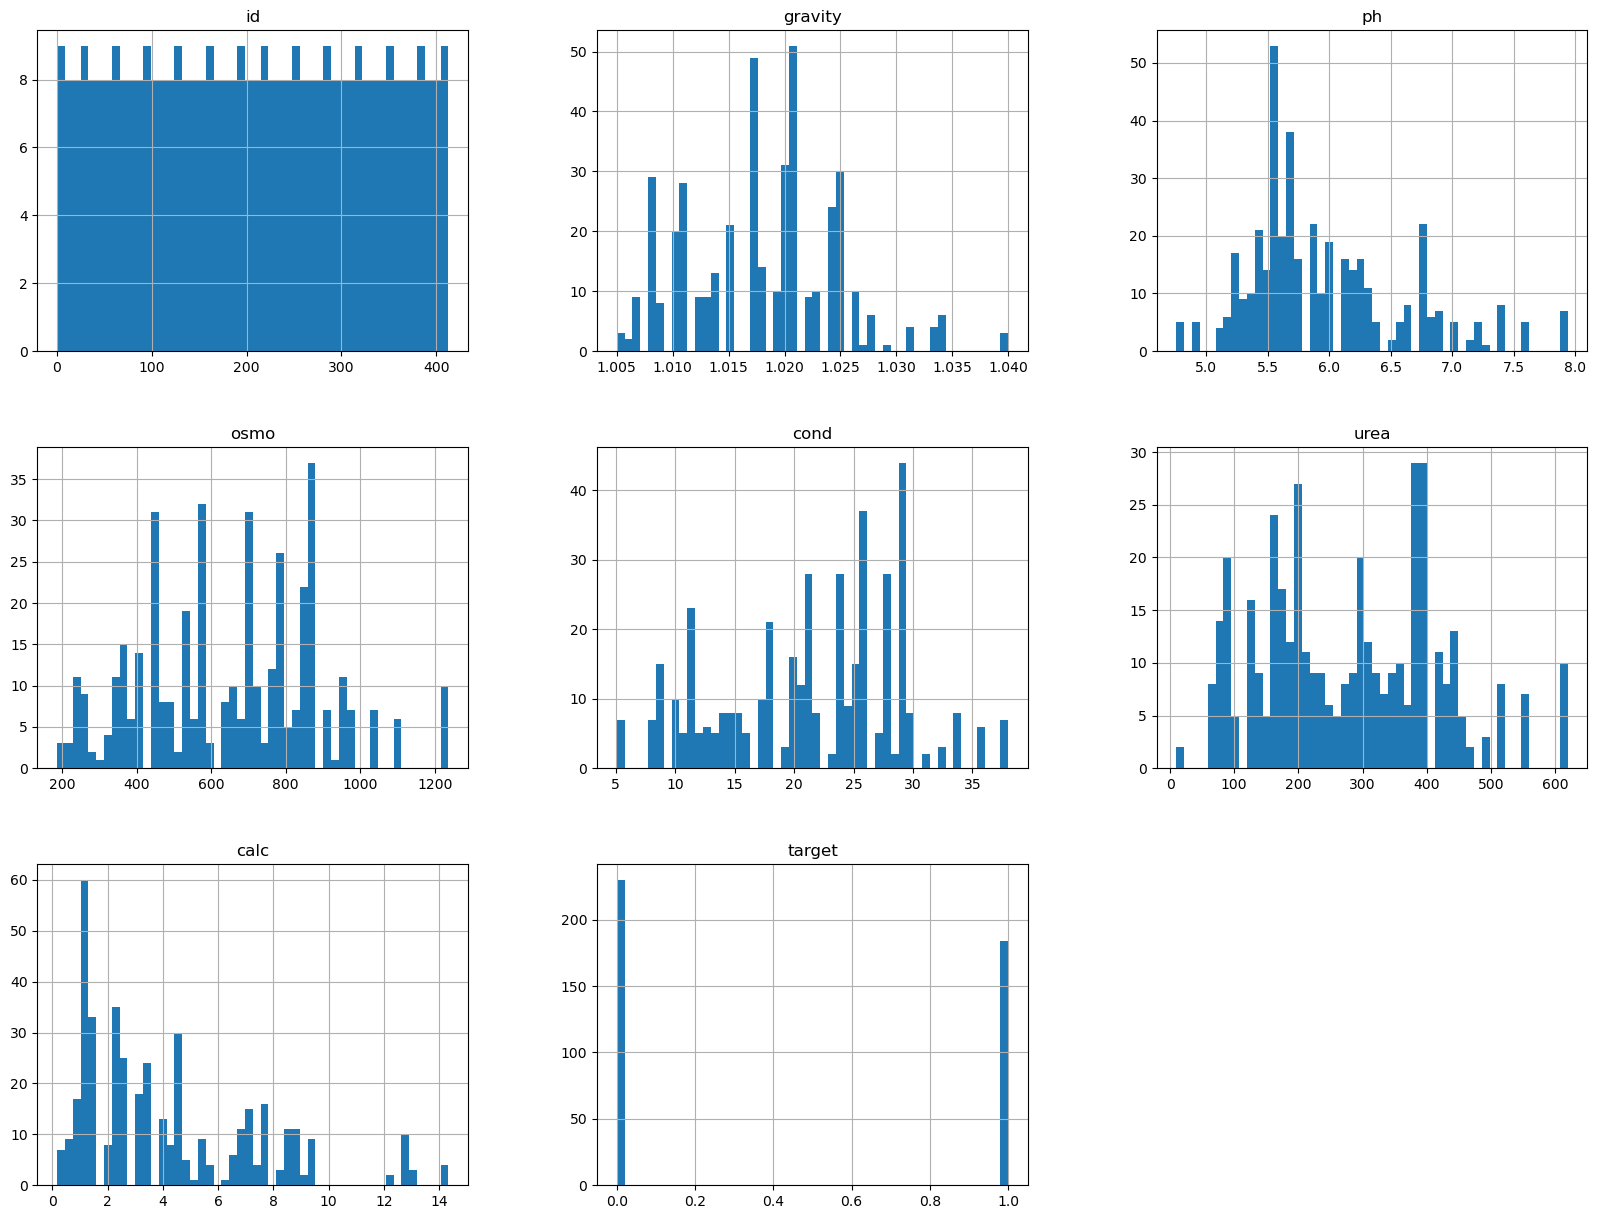

In [6]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

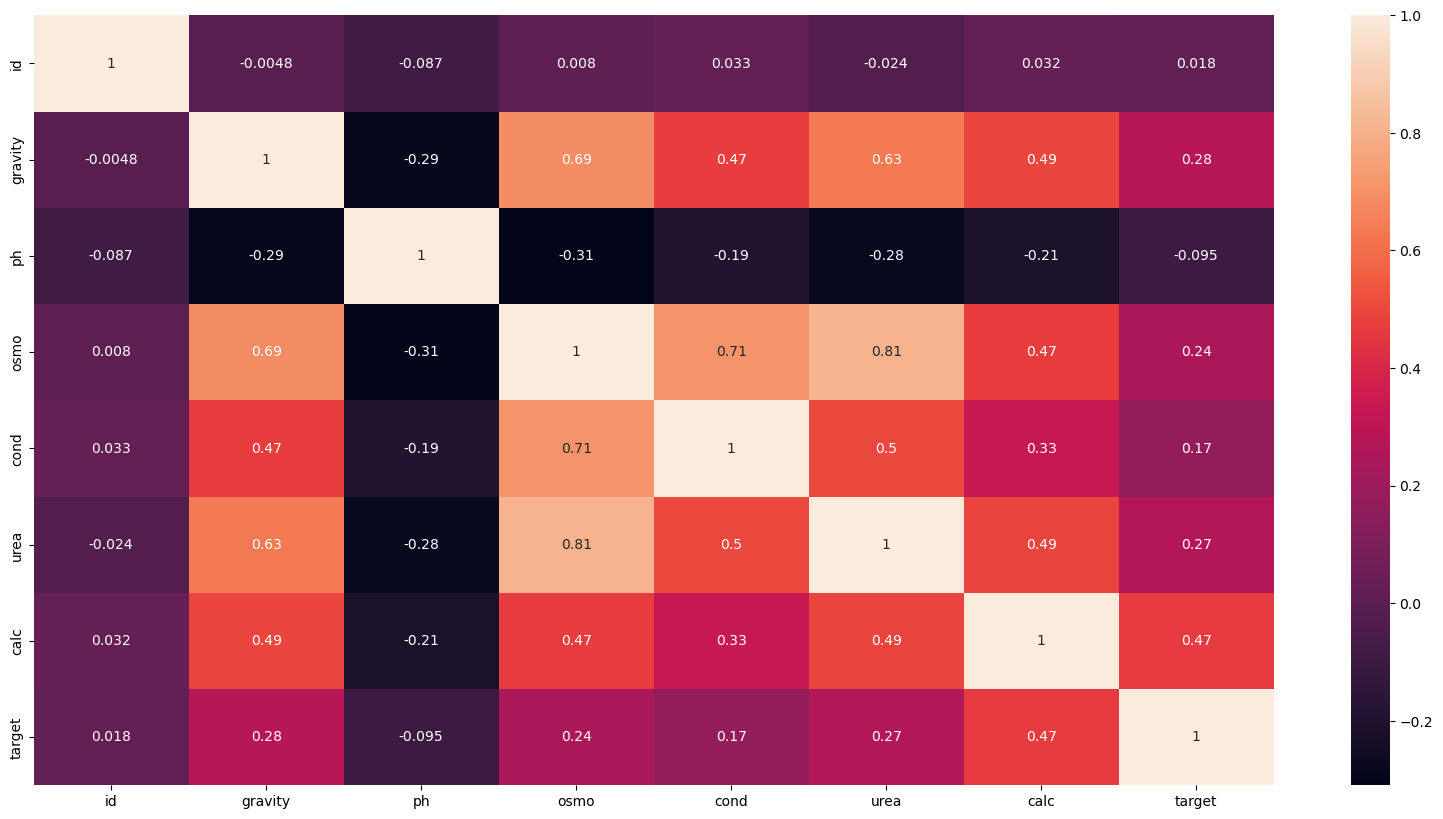

In [7]:
pd.set_option('display.width', 100)

plt.figure(figsize=(20,10))

#sns. heatmap(data.corr())

sns.heatmap(train_data.corr(), annot= True)

<AxesSubplot:>

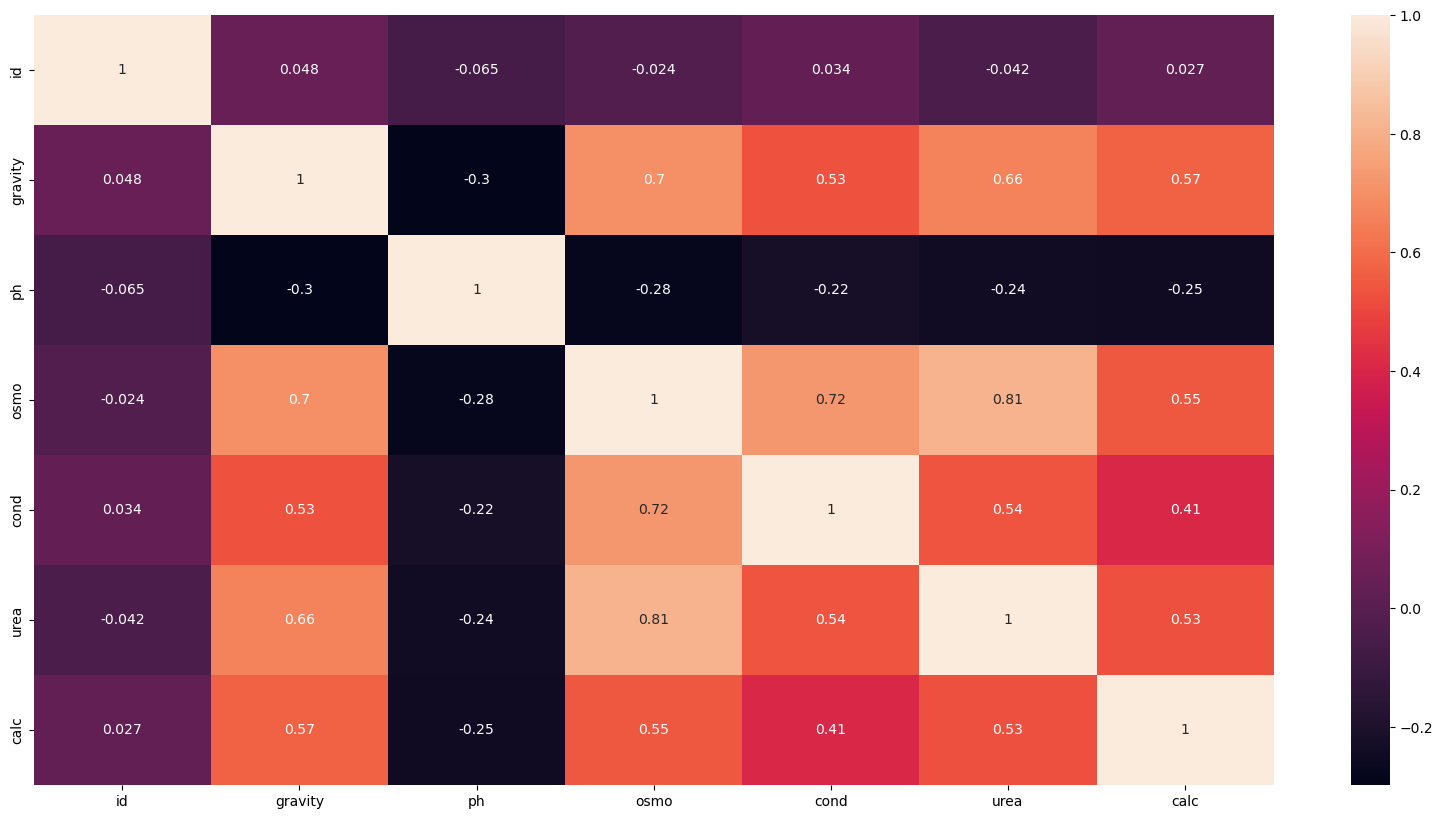

In [8]:
pd.set_option('display.width', 100)

plt.figure(figsize=(20,10))

#sns. heatmap(data.corr())

sns.heatmap(test_data.corr(), annot= True)

In [9]:
train_data.columns, test_data.columns

(Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object'),
 Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], dtype='object'))

In [10]:
targetVariable= train_data.target
new_train_data = train_data[['gravity', 'ph', 'cond', 'urea', 'calc']]
new_test_data = test_data[['gravity', 'ph', 'cond', 'urea', 'calc']]
new_train_data.head(), new_test_data.head()

(   gravity    ph  cond  urea  calc
 0    1.013  6.19  14.8   124  1.45
 1    1.025  5.40  23.6   394  4.18
 2    1.009  6.13  24.5   159  9.04
 3    1.021  4.91  20.8   398  6.63
 4    1.021  5.53  17.8   385  2.21,
    gravity    ph  cond  urea   calc
 0    1.017  5.24  11.5   152   1.16
 1    1.020  5.68  29.0   385   3.46
 2    1.024  5.36  19.5   354  13.00
 3    1.020  5.33  25.3   252   3.46
 4    1.011  5.87  29.0   457   2.36)

In [11]:
new_train_data.describe()

,gravity,ph,cond,urea,calc
count,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,21.437923,278.657005,4.114638
std,0.006675,0.642260,7.514750,136.442249,3.217641
min,1.005000,4.760000,5.100000,10.000000,0.170000
25%,1.012000,5.530000,15.500000,170.000000,1.450000
50%,1.018000,5.740000,22.200000,277.000000,3.130000
75%,1.022000,6.280000,27.600000,385.000000,6.630000
max,1.040000,7.940000,38.000000,620.000000,14.340000


In [12]:

from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as Rsquared
import warnings
warnings.filterwarnings('ignore')
import time

In [13]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(inputdata,targetVariable,test_size=0.2,random_state=42)

In [14]:
cat_model = CatBoostRegressor(iterations=50,max_depth=4,eta=0.1,
                               random_seed=8,reg_lambda=20,bootstrap_type='Bayesian')
cat_model.fit(Xtrain,Ytrain)
Y_predictn = cat_model.predict(Xtest)
error_calculation = np.sqrt(Rsquared(Ytest,Y_predictn))
print(error_calculation)

0:	learn: 0.4900013	total: 56ms	remaining: 2.74s
1:	learn: 0.4828097	total: 56.7ms	remaining: 1.36s
2:	learn: 0.4763915	total: 57.1ms	remaining: 894ms
3:	learn: 0.4711080	total: 57.4ms	remaining: 660ms
4:	learn: 0.4650764	total: 57.6ms	remaining: 519ms
5:	learn: 0.4603812	total: 57.9ms	remaining: 424ms
6:	learn: 0.4550040	total: 58.1ms	remaining: 357ms
7:	learn: 0.4524516	total: 58.4ms	remaining: 307ms
8:	learn: 0.4484709	total: 58.6ms	remaining: 267ms
9:	learn: 0.4452270	total: 58.9ms	remaining: 236ms
10:	learn: 0.4421843	total: 59.2ms	remaining: 210ms
11:	learn: 0.4399529	total: 59.4ms	remaining: 188ms
12:	learn: 0.4370953	total: 59.7ms	remaining: 170ms
13:	learn: 0.4354842	total: 59.9ms	remaining: 154ms
14:	learn: 0.4330339	total: 60.2ms	remaining: 140ms
15:	learn: 0.4312451	total: 60.4ms	remaining: 128ms
16:	learn: 0.4291057	total: 60.7ms	remaining: 118ms
17:	learn: 0.4276592	total: 60.9ms	remaining: 108ms
18:	learn: 0.4258023	total: 61.2ms	remaining: 99.9ms
19:	learn: 0.4237224	to

In [15]:

testDataPredict=cat_model.predict(ttdata)
prediction =pd.DataFrame({'id': test_data.id,'target':testDataPredict})
prediction.to_csv('targetPredicted.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [16]:
prediction.head()

,id,target
0,414,0.164145
1,415,0.482830
2,416,0.763930
3,417,0.411793
4,418,0.342071
